<a href="https://colab.research.google.com/github/a01706447/Actividad-1/blob/main/Actividad1_A01706447.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Actividad 1

María Luisa Benítez Guerrero A01706447

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cdmx = pd.read_csv('listings.csv')
cdmx = cdmx.loc[:,['room_type','number_of_reviews','host_acceptance_rate','price','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']]
cdmx["host_acceptance_rate"] = cdmx["host_acceptance_rate"].str.replace("%","")
cdmx['host_acceptance_rate'] = cdmx['host_acceptance_rate'].astype(float)
cdmx["price"] = cdmx["price"].str.replace("$","")
cdmx["price"] = cdmx["price"].str.replace(",","")
cdmx['price'] = cdmx['price'].astype(float)

cdmx

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # Remove the CWD from sys.path while we load stuff.


,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,Entire home/apt,0,NaN,4001.0,363,NaN,NaN,NaN
1,Private room,27,100.0,500.0,363,4.96,4.93,4.93
2,Private room,144,67.0,599.0,323,4.73,4.70,4.91
3,Entire home/apt,58,79.0,18000.0,331,4.59,4.70,4.75
4,Entire home/apt,61,100.0,740.0,314,4.85,4.80,4.95
...,...,...,...,...,...,...,...,...
22943,Shared room,0,NaN,450.0,365,NaN,NaN,NaN
22944,Private room,3,NaN,750.0,89,5.00,5.00,5.00
22945,Entire home/apt,28,100.0,5041.0,348,4.89,4.96,4.93
22946,Entire home/apt,72,99.0,1100.0,361,4.44,4.64,4.29


Realiza las acciones de preprocesamiento necesarias: Nulos y Outliers


In [ ]:
cdmx['price'] = cdmx['price'].fillna(np.mean)
cdmx['host_acceptance_rate'].fillna(cdmx['host_acceptance_rate'].mean(), inplace = True)
cdmx['review_scores_rating'].fillna(cdmx['review_scores_rating'].mean(), inplace = True)
cdmx['review_scores_cleanliness'].fillna(cdmx['review_scores_cleanliness'].mean(), inplace = True)
cdmx['review_scores_communication'].fillna(cdmx['review_scores_communication'].mean(), inplace = True)

cdmx

,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,Entire home/apt,0,89.695894,4001.0,363,4.704128,4.748089,4.814688
1,Private room,27,100.000000,500.0,363,4.960000,4.930000,4.930000
2,Private room,144,67.000000,599.0,323,4.730000,4.700000,4.910000
3,Entire home/apt,58,79.000000,18000.0,331,4.590000,4.700000,4.750000
4,Entire home/apt,61,100.000000,740.0,314,4.850000,4.800000,4.950000
...,...,...,...,...,...,...,...,...
22943,Shared room,0,89.695894,450.0,365,4.704128,4.748089,4.814688
22944,Private room,3,89.695894,750.0,89,5.000000,5.000000,5.000000
22945,Entire home/apt,28,100.000000,5041.0,348,4.890000,4.960000,4.930000
22946,Entire home/apt,72,99.000000,1100.0,361,4.440000,4.640000,4.290000


In [ ]:
en_home = cdmx[cdmx['room_type']=='Entire home/apt']
en_home.drop('room_type',axis=1, inplace=True)
y=en_home

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 6.5*iqr
Limite_Inferior_iqr= percentile25 - 6.5*iqr
df3= en_home[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

en_room=df3.copy()
en_room=en_room.fillna(round(df3.mean(),1))

In [ ]:
priv = cdmx[cdmx['room_type']=='Private room']
priv.drop('room_type',axis=1, inplace=True)
y=priv

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 6.5*iqr
Limite_Inferior_iqr= percentile25 - 6.5*iqr
df3= priv[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

priv_room=df3.copy()
priv_room=priv_room.fillna(round(df3.mean(),1))

In [ ]:
hotel = cdmx[cdmx['room_type']=='Hotel room']
hotel.drop('room_type',axis=1, inplace=True)
y=hotel

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 6.5*iqr
Limite_Inferior_iqr= percentile25 - 6.5*iqr
df3= hotel[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

hotel_room=df3.copy()
hotel_room=hotel_room.fillna(round(df3.mean(),1))

In [ ]:
shared = cdmx[cdmx['room_type']=='Shared room']
shared.drop('room_type',axis=1, inplace=True)
y=shared

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 6.5*iqr
Limite_Inferior_iqr= percentile25 - 6.5*iqr
df3= shared[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

shared_room=df3.copy()
shared_room=shared_room.fillna(round(df3.mean(),1))

Analizar la correlación que existe en cada tipo de habitación respecto a las variables siguientes, utilizando Python y Google Colab, obtener los datos y gráficos requeridos en cada caso.

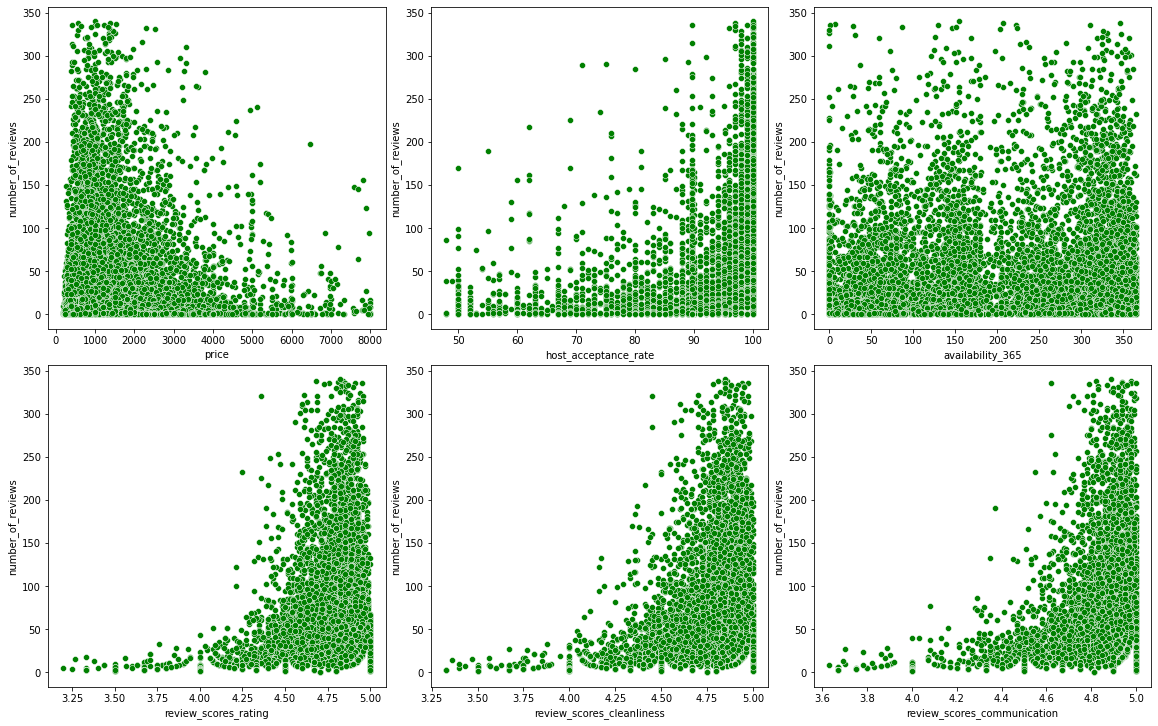

In [ ]:
#Entire home/apt
from turtle import color
column_sels = ['price','host_acceptance_rate','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']
x = en_room.loc[:,column_sels]
y = en_room['number_of_reviews']

fig, axs = plt.subplots(ncols=3, nrows=2,figsize=(16,10))
index=0
axs=axs.flatten()
for i, k in enumerate(column_sels): #i índice, k valores
  sns.scatterplot(x=x[k], y=y, data=en_room, ax=axs[i], color='green')
plt.tight_layout(pad=0.4)



In [ ]:
from sklearn.linear_model import LinearRegression

column_sels = ['price','host_acceptance_rate','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']
x = en_room.loc[:,column_sels]
y = np.array(en_room['number_of_reviews']).reshape(-1,1)

print('Entire home/apt')
for i, k in enumerate(column_sels): #i índice, k valores
  model = LinearRegression()
  model.fit(X=np.array(x[k]).reshape(-1,1), y=y)
  model.__dict__
  print(column_sels[i], model.score(np.array(x[k]).reshape(-1,1),y))


Entire home/apt
price 0.004444278399522661
host_acceptance_rate 0.019563187378069835
availability_365 0.003913286990574361
review_scores_rating 0.0038703930319675672
review_scores_cleanliness 0.004296031765542274
review_scores_communication 0.005560387637971065


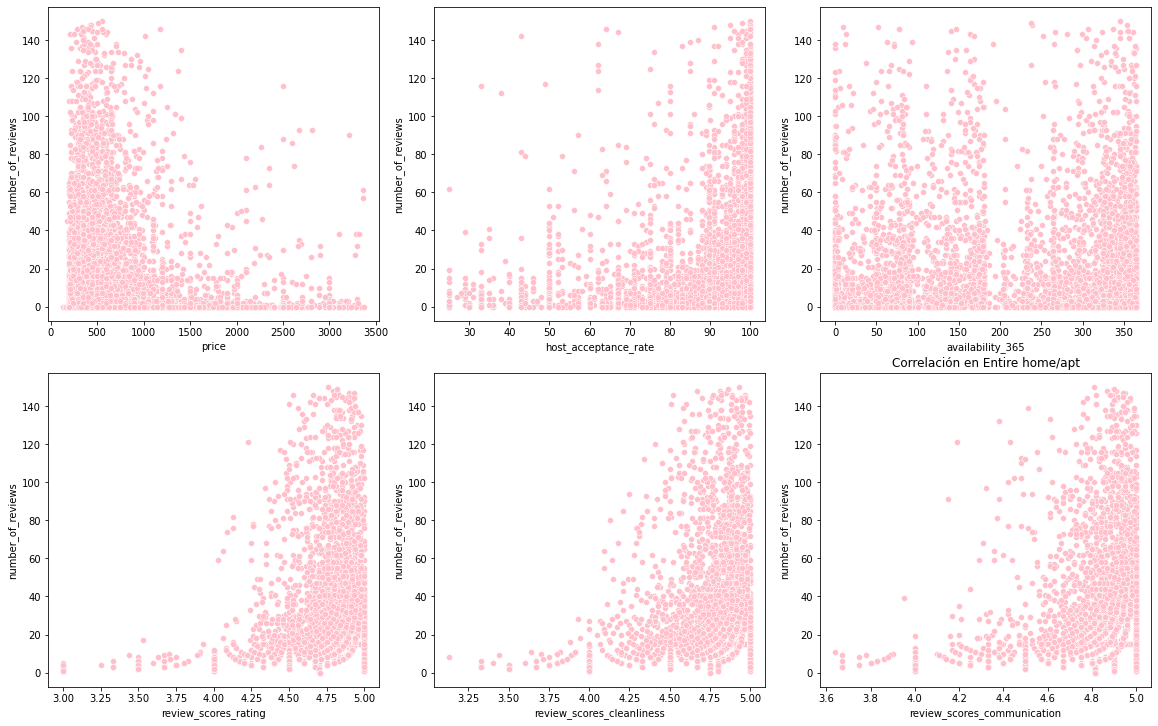

In [ ]:
#Private room
from turtle import color
column_sels = ['price','host_acceptance_rate','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']
x = priv_room.loc[:,column_sels]
y = priv_room['number_of_reviews']

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(16,10))
plt.title('Correlación en Entire home/apt')
index=0
axs=axs.flatten()
for i, k in enumerate(column_sels): #i índice, k valores
  sns.scatterplot(x=x[k], y=y, data=en_room, ax=axs[i], color='pink')
plt.tight_layout(pad=0.4)

In [ ]:
column_sels = ['price','host_acceptance_rate','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']
x = priv_room.loc[:,column_sels]
y = priv_room['number_of_reviews']

print('Private room')
for i, k in enumerate(column_sels): #i índice, k valores
  model = LinearRegression()
  model.fit(X=np.array(x[k]).reshape(-1,1), y=np.array(y).reshape(-1,1))
  model.__dict__
  print(column_sels[i], model.score(np.array(x[k]).reshape(-1,1),np.array(y).reshape(-1,1)))

Private room
price 0.005389172949229026
host_acceptance_rate 0.016215860030568074
availability_365 0.008690376476888528
review_scores_rating 0.00787036131415253
review_scores_cleanliness 0.0026858856315504775
review_scores_communication 0.001932456755003531


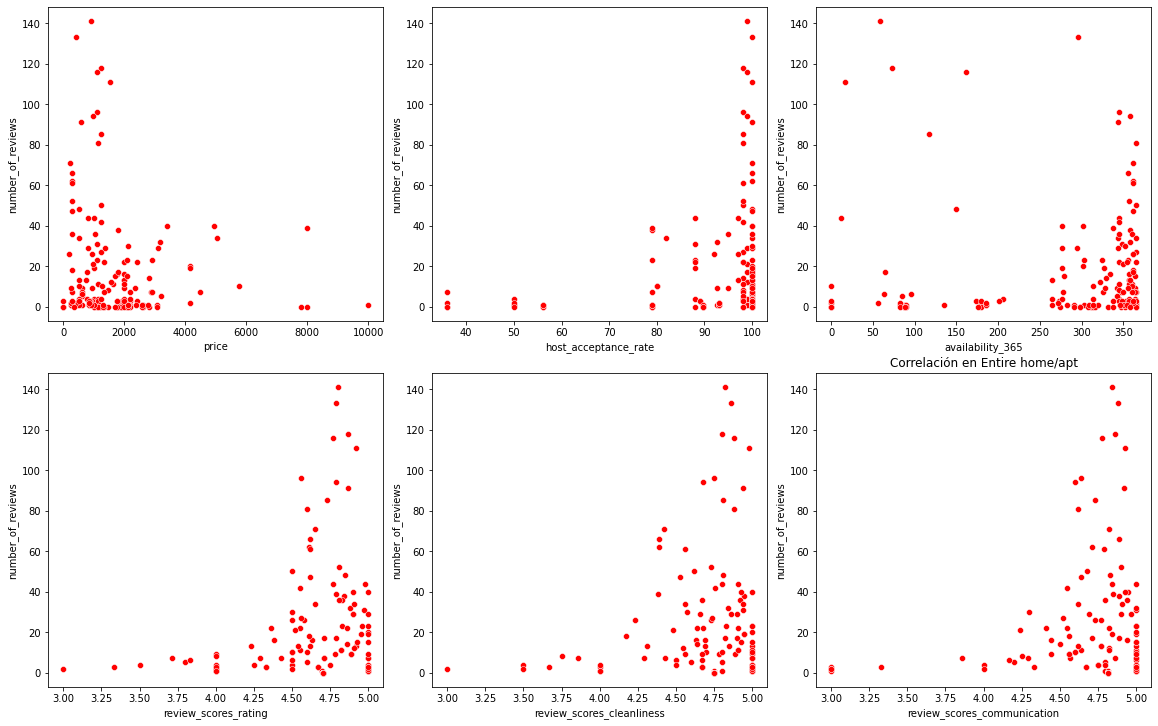

In [ ]:
#Hotel room
from turtle import color
column_sels = ['price','host_acceptance_rate','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']
x = hotel_room.loc[:,column_sels]
y = hotel_room['number_of_reviews']

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(16,10))
plt.title('Correlación en Entire home/apt')
index=0
axs=axs.flatten()
for i, k in enumerate(column_sels): #i índice, k valores
  sns.scatterplot(x=x[k], y=y, data=en_room, ax=axs[i], color = 'red')
plt.tight_layout(pad=0.4)

In [ ]:
column_sels = ['price','host_acceptance_rate','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']
x = hotel_room.loc[:,column_sels]
y = hotel_room['number_of_reviews']

print('Hotel room')
for i, k in enumerate(column_sels): #i índice, k valores
  model = LinearRegression()
  model.fit(X=np.array(x[k]).reshape(-1,1), y=np.array(y).reshape(-1,1))
  model.__dict__
  print(column_sels[i], model.score(np.array(x[k]).reshape(-1,1),np.array(y).reshape(-1,1)))

Hotel room
price 0.012826996900350163
host_acceptance_rate 0.03303149877455891
availability_365 5.675749483446957e-05
review_scores_rating 0.009656069340207574
review_scores_cleanliness 0.00013081591699626305
review_scores_communication 0.0015616242567080274


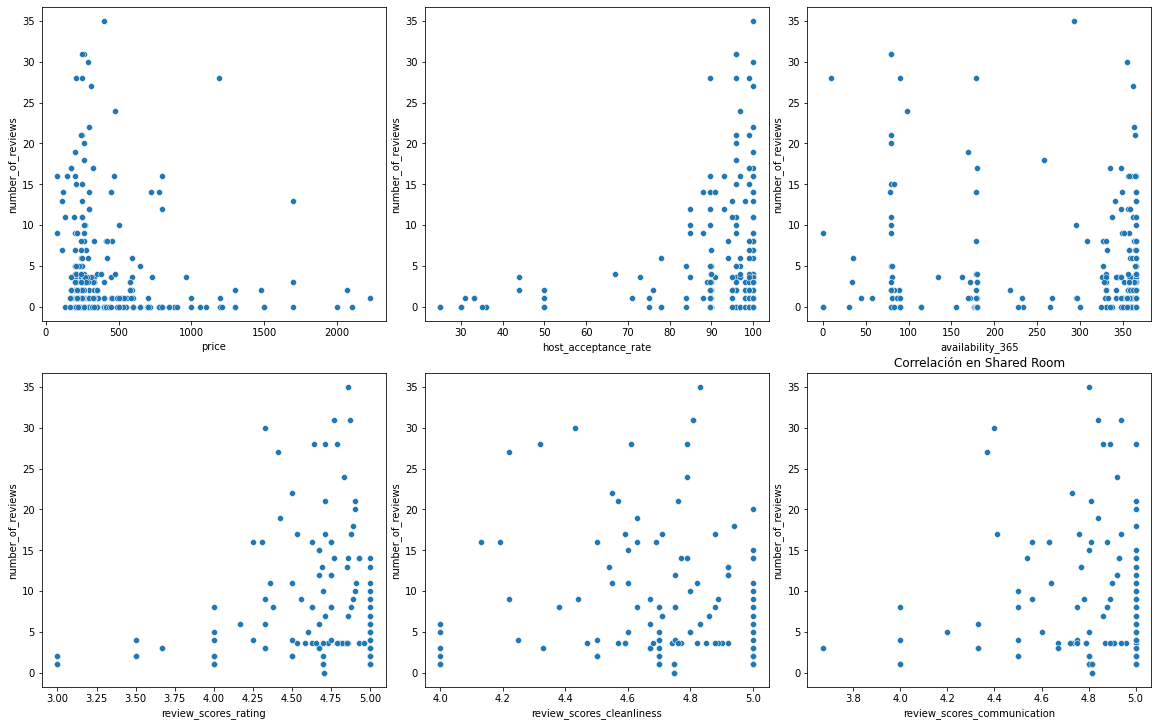

In [ ]:
#Shared room
from turtle import color
column_sels = ['price','host_acceptance_rate','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']
x = shared_room.loc[:,column_sels]
y = shared_room['number_of_reviews']

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(16,10))
plt.title('Correlación en Shared Room')
index=0
axs=axs.flatten()
for i, k in enumerate(column_sels): #i índice, k valores
  sns.scatterplot(x=x[k], y=y, data=en_room, ax=axs[i])
plt.tight_layout(pad=0.4)

In [ ]:
column_sels = ['price','host_acceptance_rate','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']
x = shared_room.loc[:,column_sels]
y = shared_room['number_of_reviews']

print('Shared room')
for i, k in enumerate(column_sels): #i índice, k valores
  model = LinearRegression()
  model.fit(X=np.array(x[k]).reshape(-1,1), y=np.array(y).reshape(-1,1))
  model.__dict__
  print(column_sels[i], model.score(np.array(x[k]).reshape(-1,1),np.array(y).reshape(-1,1)))

Shared room
price 0.011165025313762289
host_acceptance_rate 0.044839979816536424
availability_365 0.02569869846419659
review_scores_rating 0.00016934429524950723
review_scores_cleanliness 0.006785791502896599
review_scores_communication 0.0015192615835777357


Crear el modelo matemático que describa de mejor manera el número de reseñas para cada tipo de alojamiento, utilizando la variable con con mayor correlación

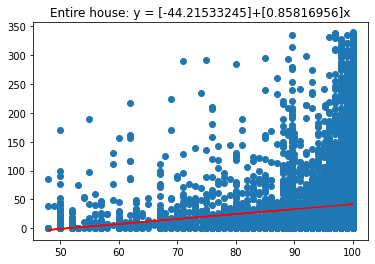

In [ ]:
x = np.array(en_room['host_acceptance_rate']).reshape(-1,1)
y = np.array(en_room['number_of_reviews']).reshape(-1,1)

#Creamos el modelo
reg = LinearRegression().fit(x,y)
y_pred = reg.predict(x)

#Graficamos
fig,ax = plt.subplots()
leyenda = 'y = ' + str(reg.intercept_)+ '+' + str(reg.coef_[0]) + 'x'
ax.set_title('Entire house: ' + leyenda)

ax.plot(x,y_pred,c='red')
ax.scatter(x,y)

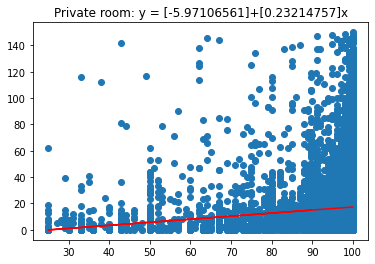

In [ ]:
x = np.array(priv_room['host_acceptance_rate']).reshape(-1,1)
y = np.array(priv_room['number_of_reviews']).reshape(-1,1)

#Creamos el modelo
reg = LinearRegression().fit(x,y)
y_pred = reg.predict(x)

#Graficamos
fig,ax = plt.subplots()
leyenda = 'y = ' + str(reg.intercept_)+ '+' + str(reg.coef_[0]) + 'x'
ax.set_title('Private room: ' + leyenda)

ax.plot(x,y_pred,c='red')
ax.scatter(x,y)

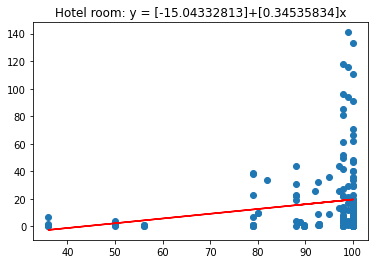

In [ ]:
x = np.array(hotel_room['host_acceptance_rate']).reshape(-1,1)
y = np.array(hotel_room['number_of_reviews']).reshape(-1,1)

#Creamos el modelo
reg = LinearRegression().fit(x,y)
y_pred = reg.predict(x)

#Graficamos
fig,ax = plt.subplots()
leyenda = 'y = ' + str(reg.intercept_)+ '+' + str(reg.coef_[0]) + 'x'
ax.set_title('Hotel room: '+leyenda)

ax.plot(x,y_pred,c='red')
ax.scatter(x,y)

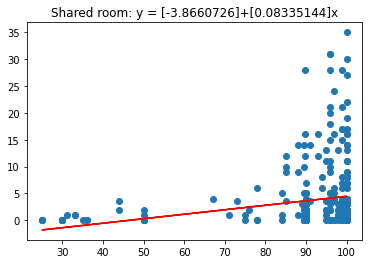

In [ ]:
x = np.array(shared_room['host_acceptance_rate']).reshape(-1,1)
y = np.array(shared_room['number_of_reviews']).reshape(-1,1)

#Creamos el modelo
reg = LinearRegression().fit(x,y)
y_pred = reg.predict(x)

#Graficamos
fig,ax = plt.subplots()
leyenda = 'y = ' + str(reg.intercept_)+ '+' + str(reg.coef_[0]) + 'x'
ax.set_title('Shared room: '+leyenda)

ax.plot(x,y_pred,c='red')
ax.scatter(x,y)

Realizar una tabla de todos los coeficientes de determinación y correlación obtenidos para cada tipo de habitación

In [ ]:
df = pd.DataFrame(columns=['Room type', 'Coef_deter', 'Coef_correl'])
df['Room type'] = ['Entire room', 'Private room', 'Hotel room', 'Shared room']
model_en = LinearRegression().fit(X=en_room[['host_acceptance_rate']],y=en_room[['number_of_reviews']])
deter_en = model_en.score(X=en_room[['host_acceptance_rate']],y=en_room[['number_of_reviews']])
model_priv = LinearRegression().fit(X=priv_room[['host_acceptance_rate']],y=priv_room[['number_of_reviews']])
deter_priv = model_priv.score(X=priv_room[['host_acceptance_rate']],y=priv_room[['number_of_reviews']])
model_hotel = LinearRegression().fit(X=hotel_room[['host_acceptance_rate']],y=hotel_room[['number_of_reviews']])
deter_hotel = model_hotel.score(X=hotel_room[['host_acceptance_rate']],y=hotel_room[['number_of_reviews']])
model_shared = LinearRegression().fit(X=shared_room[['host_acceptance_rate']],y=shared_room[['number_of_reviews']])
deter_shared = model_shared.score(X=shared_room[['host_acceptance_rate']],y=shared_room[['number_of_reviews']])
df['Coef_deter'] = [deter_en, deter_priv, deter_hotel, deter_shared]
correl_en = np.sqrt(deter_en)
correl_priv = np.sqrt(deter_priv)
correl_hotel = np.sqrt(deter_hotel)
correl_shared = np.sqrt(deter_shared)
df['Coef_correl'] = [correl_en, correl_priv, correl_hotel, correl_shared]
df

,Room type,Coef_deter,Coef_correl
0,Entire room,0.019563,0.139868
1,Private room,0.016216,0.127342
2,Hotel room,0.033031,0.181746
3,Shared room,0.044840,0.211755
